# Logistic Regression - Women Risk Predictor

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix, roc_curve
import joblib
import os

In [ ]:
# Load processed dataset
fp = pd.read_csv("../data/women_risk_processed.csv")

In [ ]:
# Display first few rows
fp.head()

,Timestamp,1. What is your age group?,2. What is your occupation?,3. At what time of day did the incident occur?,4. Where did the incident occur?,5. How crowded was the location at the time of the incident?,6. What was the lighting condition in the area?,7. Was any form of security present at the location?,8. Were you familiar with the area where the incident occurred?,9. What type of harassment did you experience?,10. How often have you experienced harassment in similar situations?,11. How safe did you feel during the incident?,"12. Overall, how would you rate the risk level of harassment in that situation?"
0,-1.717054,-1.101957,0.768289,0.050825,0.447315,1.626236,-0.035267,0.638877,0.438805,-0.086657,0.886103,-0.205660,2.179449
1,-1.686931,-1.101957,0.768289,0.050825,-0.369212,-1.378055,0.775880,0.638877,1.130072,-0.086657,-1.843410,2.328366,1.300022
2,-1.656807,-1.101957,0.768289,1.512033,-1.185740,0.875163,1.587028,0.638877,-0.943731,-0.917117,0.886103,1.483691,1.300022
3,-1.626683,-1.101957,0.768289,1.512033,-0.369212,-1.378055,0.775880,0.638877,0.438805,-0.086657,-0.023735,1.483691,-1.338258
4,-1.596559,-0.233977,0.038097,-0.679780,0.447315,0.124090,-0.035267,1.557262,-0.252463,1.574264,0.886103,1.483691,-1.338258


In [ ]:
# Check dataset dimensions
fp.shape

(115, 13)

In [ ]:
# Separate features and target, convert to binary classification
target_col = '12. Overall, how would you rate the risk level of harassment in that situation?'
X = fp.drop(target_col, axis=1)
y = fp[target_col]
y = (y > y.median()).astype(int)

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Initialize Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
# Train the model
model.fit(X_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",42
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`multi

In [ ]:
# Make predictions on test set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

In [ ]:
# Calculate accuracy
accuracy_score(y_test, y_pred)

0.8695652173913043

In [ ]:
# Calculate precision
precision_score(y_test, y_pred)

1.0

In [ ]:
# Calculate recall
recall_score(y_test, y_pred)

0.25

In [ ]:
# Calculate F1-score
f1_score(y_test, y_pred)

0.4

In [ ]:
# Calculate ROC-AUC score
roc_auc_score(y_test, y_pred_proba)

0.9078947368421053

In [ ]:
# Display classification report
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.86      1.00      0.93        19\n           1       1.00      0.25      0.40         4\n\n    accuracy                           0.87        23\n   macro avg       0.93      0.62      0.66        23\nweighted avg       0.89      0.87      0.84        23\n'

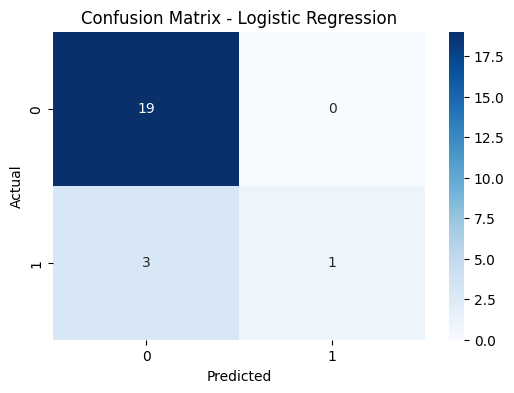

In [ ]:
# Visualize confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

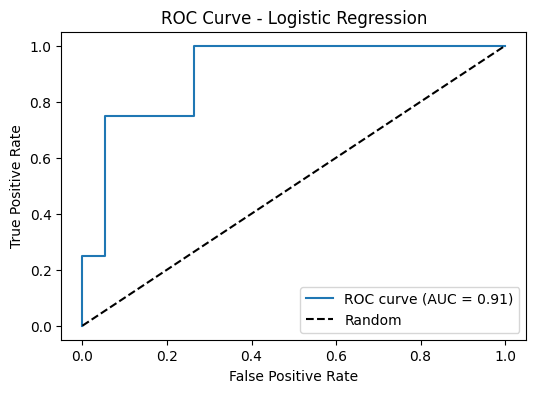

In [ ]:
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.show()

## Hyperparameter Tuning

In [ ]:
# Define hyperparameter grid for tuning
param_grid = {
    "C": [0.01, 0.1, 1, 10, 100],
    "penalty": ['l2'],
    "solver": ['lbfgs', 'liblinear']
}

In [ ]:
# Initialize GridSearchCV for hyperparameter tuning
grid = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [ ]:
# Train model with hyperparameter tuning
grid.fit(X_train, y_train)

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(


,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",LogisticRegre...ndom_state=42)
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'C': [0.01, 0.1, ...], 'penalty': ['l2'], 'solver': ['lbfgs', 'liblinear']}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'accuracy'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : the score 

In [ ]:
# Display best hyperparameters
print("Best parameters:", grid.best_params_)
print("Best CV accuracy:", grid.best_score_)

Best parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Best CV accuracy: 0.8368421052631578


In [ ]:
# Get best model
best_model = grid.best_estimator_

In [ ]:
# Make predictions with tuned model
y_pred_tuned = best_model.predict(X_test)
y_pred_proba_tuned = best_model.predict_proba(X_test)[:, 1]

In [ ]:
# Calculate accuracy of tuned model
accuracy_score(y_test, y_pred_tuned)

0.8260869565217391

In [ ]:
# Display classification report for tuned model
classification_report(y_test, y_pred_tuned)

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(averag

'              precision    recall  f1-score   support\n\n           0       0.83      1.00      0.90        19\n           1       0.00      0.00      0.00         4\n\n    accuracy                           0.83        23\n   macro avg       0.41      0.50      0.45        23\nweighted avg       0.68      0.83      0.75        23\n'

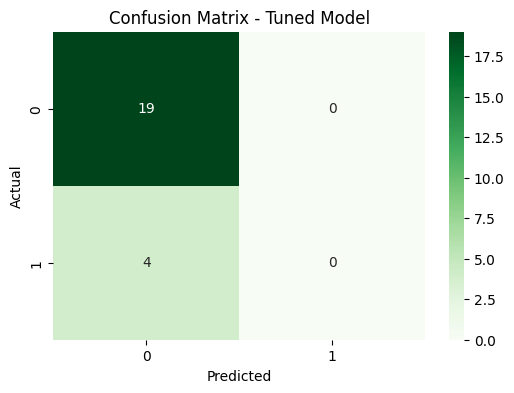

In [ ]:
# Visualize confusion matrix for tuned model
cm_tuned = confusion_matrix(y_test, y_pred_tuned)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Tuned Model')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


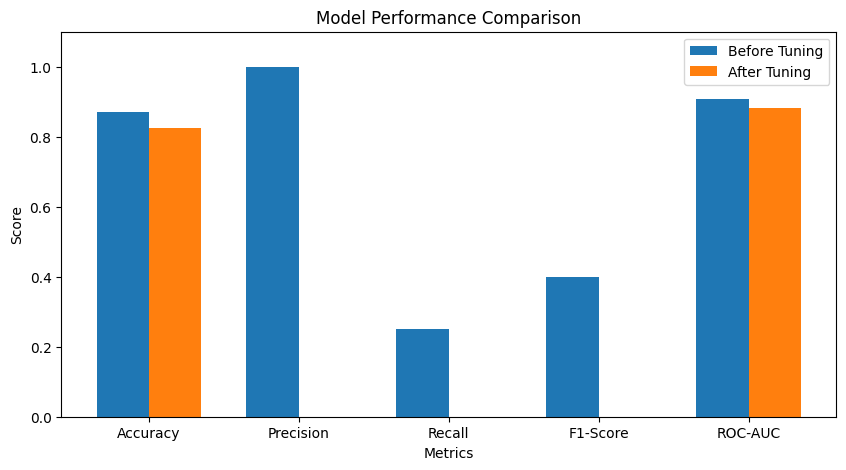

In [ ]:
# Compare model performance before and after tuning
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
before = [accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), 
          recall_score(y_test, y_pred), f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred_proba)]
after = [accuracy_score(y_test, y_pred_tuned), precision_score(y_test, y_pred_tuned), 
         recall_score(y_test, y_pred_tuned), f1_score(y_test, y_pred_tuned), roc_auc_score(y_test, y_pred_proba_tuned)]

x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(10, 5))
plt.bar(x - width/2, before, width, label='Before Tuning')
plt.bar(x + width/2, after, width, label='After Tuning')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(x, metrics)
plt.legend()
plt.ylim([0, 1.1])
plt.show()

## Save Model

In [ ]:
# Save the trained model
os.makedirs('../models', exist_ok=True)
joblib.dump(best_model, '../models/logistic_regression_model.pkl')
print("Model saved!")

Model saved!
